In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Library

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Read Data % EDA

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [4]:
df.shape

(1025, 14)

In [8]:
df.head().style.background_gradient(cmap='Reds')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.duplicated().sum()

723

In [14]:
df.nunique().sum()

400

In [18]:
for column in df.columns:
    print(f"Column: {column} → {df[column].nunique()} unique values")


Column: age → 41 unique values
Column: sex → 2 unique values
Column: cp → 4 unique values
Column: trestbps → 49 unique values
Column: chol → 152 unique values
Column: fbs → 2 unique values
Column: restecg → 3 unique values
Column: thalach → 91 unique values
Column: exang → 2 unique values
Column: oldpeak → 40 unique values
Column: slope → 3 unique values
Column: ca → 5 unique values
Column: thal → 4 unique values
Column: target → 2 unique values


**Visulization** 

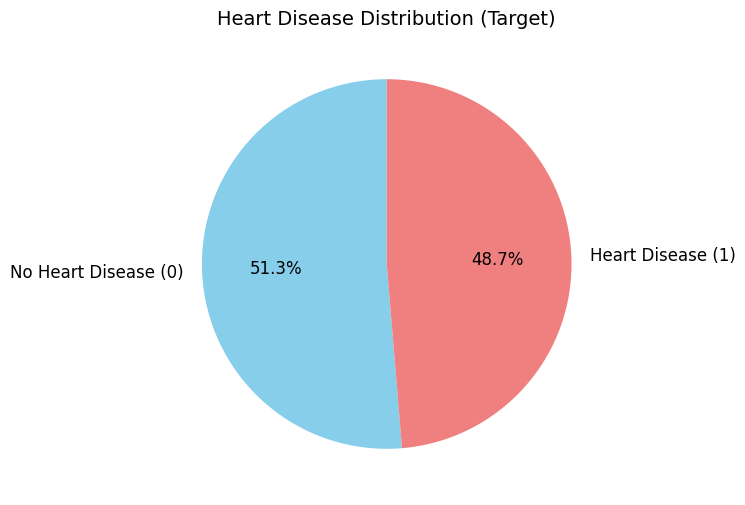

In [24]:
target_counts = df['target'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(target_counts, 
        labels=['No Heart Disease (0)', 'Heart Disease (1)'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['skyblue', 'lightcoral'], 
        textprops={'fontsize':12})

plt.title('Heart Disease Distribution (Target)', fontsize=14)
plt.show()


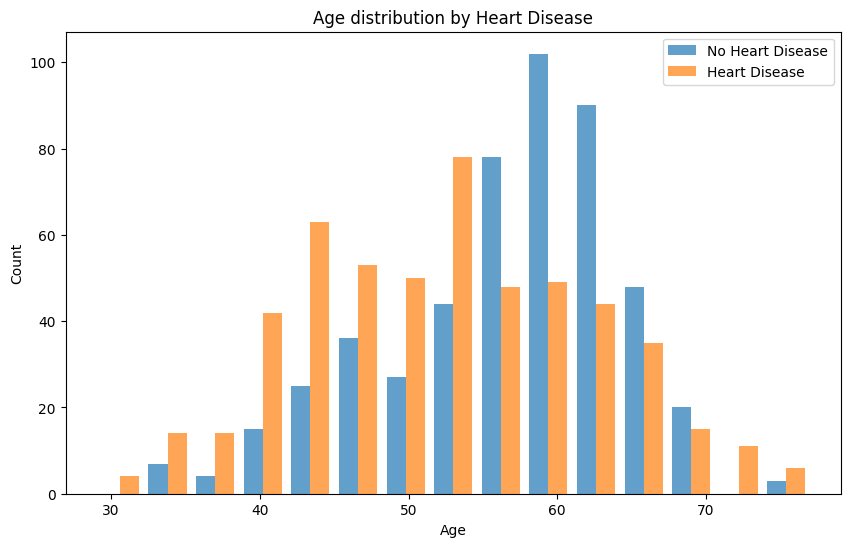

In [19]:
plt.figure(figsize=(10,6))
plt.hist([df[df['target']==0]['age'], df[df['target']==1]['age']], 
         bins=15, label=['No Heart Disease', 'Heart Disease'], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by Heart Disease')
plt.legend()
plt.show()


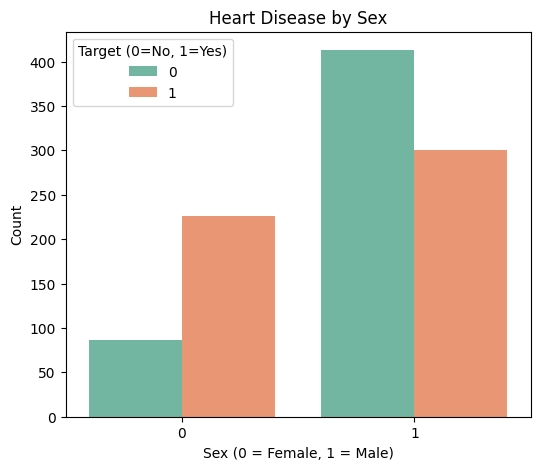

In [20]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='sex', hue='target', palette='Set2')

plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


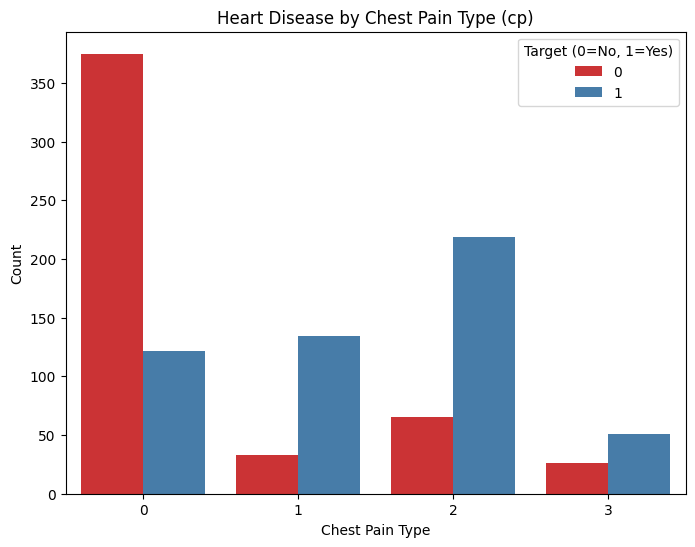

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')

plt.title('Heart Disease by Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


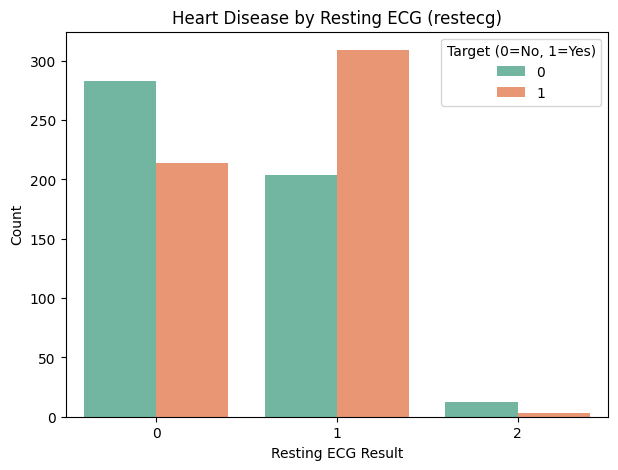

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='restecg', hue='target', palette='Set2')

plt.title('Heart Disease by Resting ECG (restecg)')
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


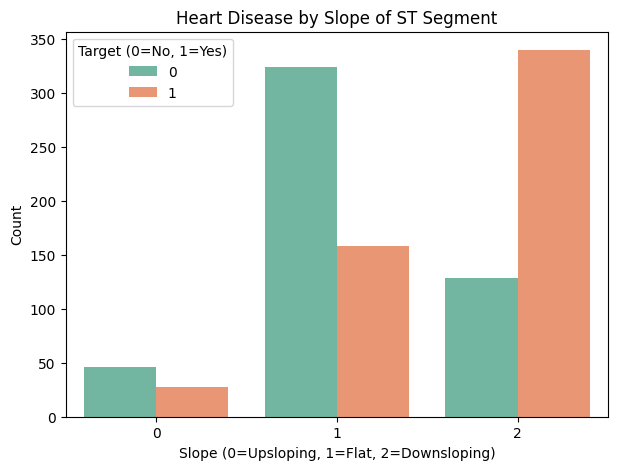

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='slope', hue='target', palette='Set2')

plt.title('Heart Disease by Slope of ST Segment')
plt.xlabel('Slope (0=Upsloping, 1=Flat, 2=Downsloping)')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()


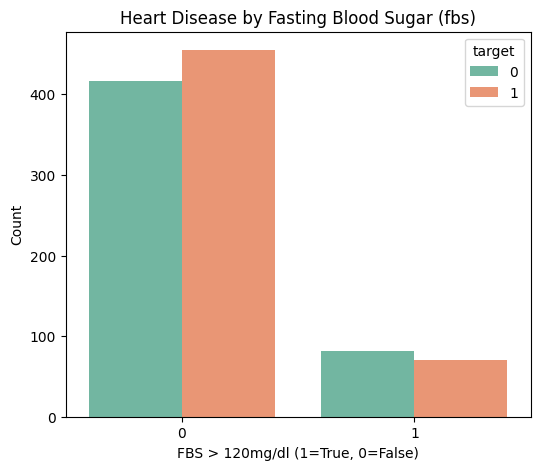

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='fbs', hue='target', palette='Set2')
plt.title('Heart Disease by Fasting Blood Sugar (fbs)')
plt.xlabel('FBS > 120mg/dl (1=True, 0=False)')
plt.ylabel('Count')
plt.show()


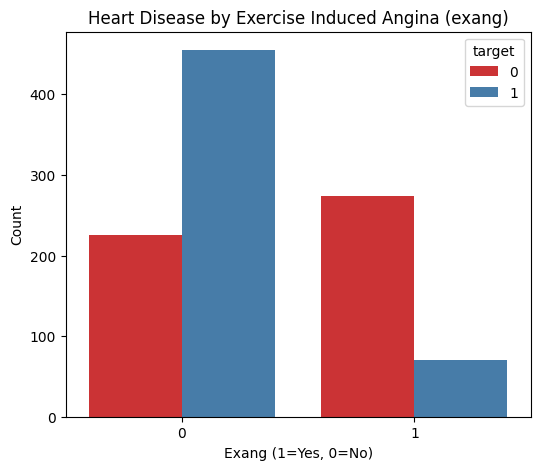

In [29]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='exang', hue='target', palette='Set1')
plt.title('Heart Disease by Exercise Induced Angina (exang)')
plt.xlabel('Exang (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()


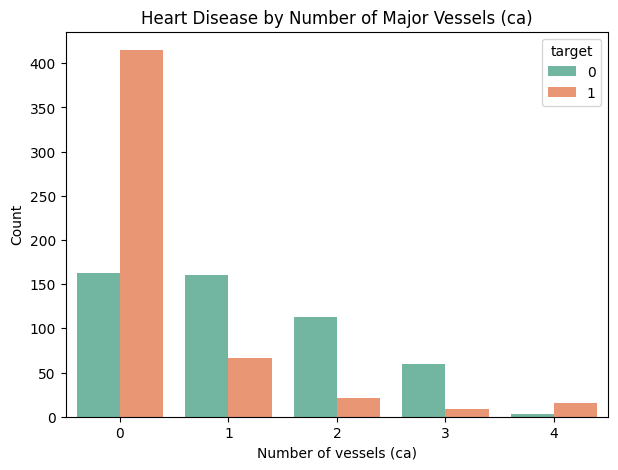

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ca', hue='target', palette='Set2')
plt.title('Heart Disease by Number of Major Vessels (ca)')
plt.xlabel('Number of vessels (ca)')
plt.ylabel('Count')
plt.show()


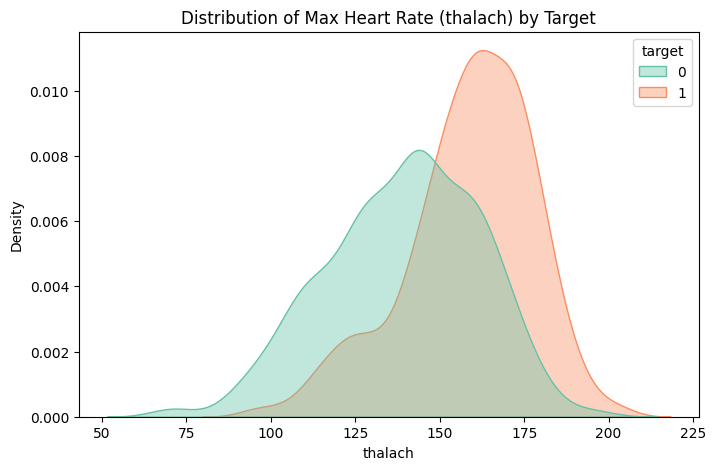

In [37]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='thalach', hue='target', fill=True, palette='Set2', alpha=0.4)
plt.title('Distribution of Max Heart Rate (thalach) by Target')
plt.show()


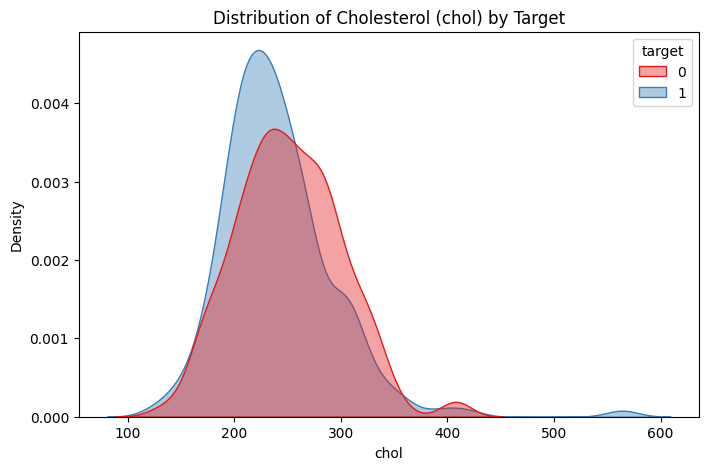

In [38]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='chol', hue='target', fill=True, palette='Set1', alpha=0.4)
plt.title('Distribution of Cholesterol (chol) by Target')
plt.show()


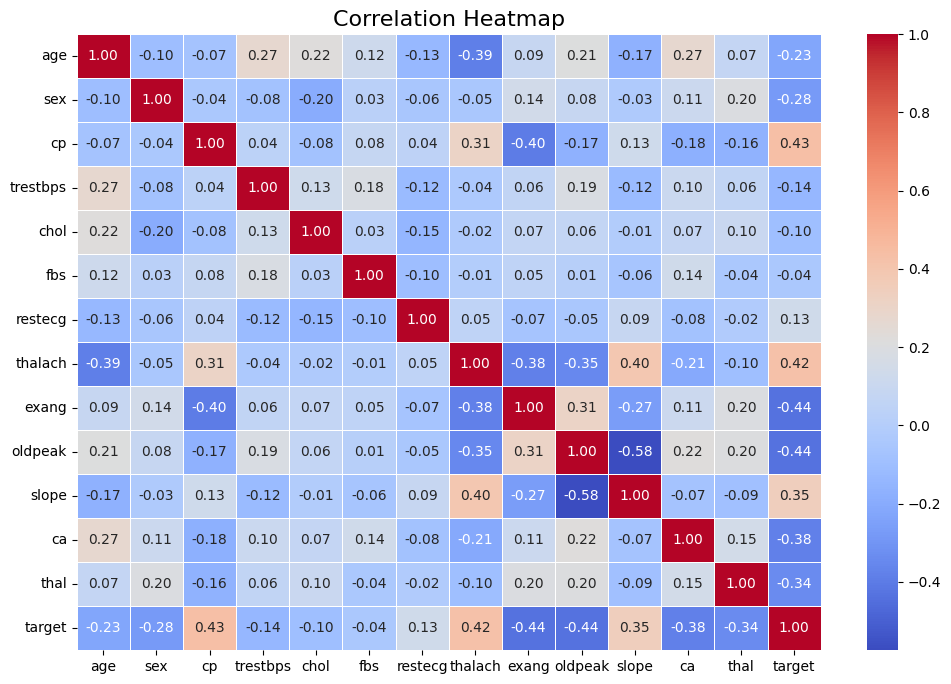

In [25]:
plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(corr, 
            annot=True,       
            cmap='coolwarm',  
            fmt=".2f",        
            linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


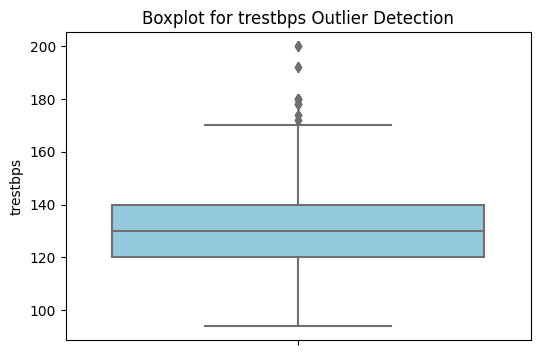

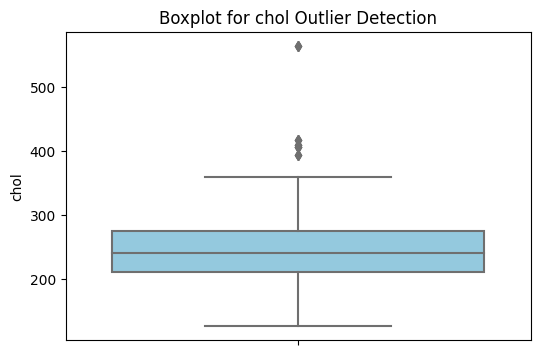

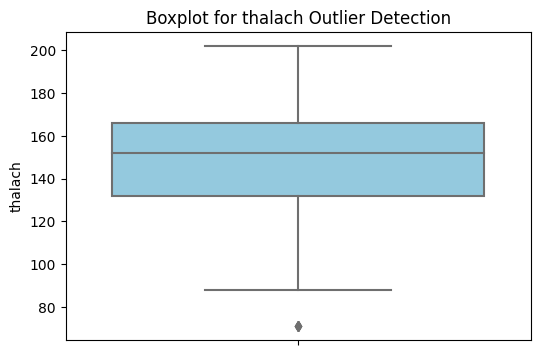

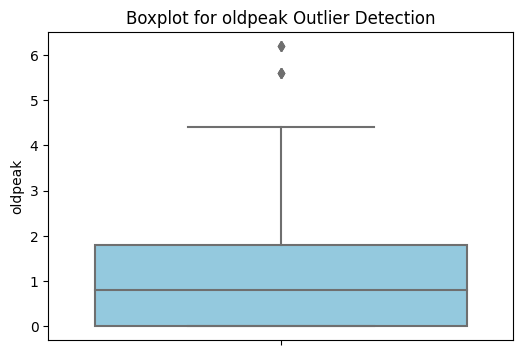

In [45]:
cols_to_plot = ['trestbps','chol','thalach','oldpeak']

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot for {col} Outlier Detection", fontsize=12)
    plt.show()
